In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('lr_assumption.csv')

In [47]:
x = df.iloc[:,0:3].values
y = df.iloc[:,0:-1].values

In [48]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)

In [49]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
# Residual
y_pred = lr.predict(x_test)
residual = y_test-y_pred

### Linear Relationshipp between input and output

Text(0.5, 1.0, 'Feature 3')

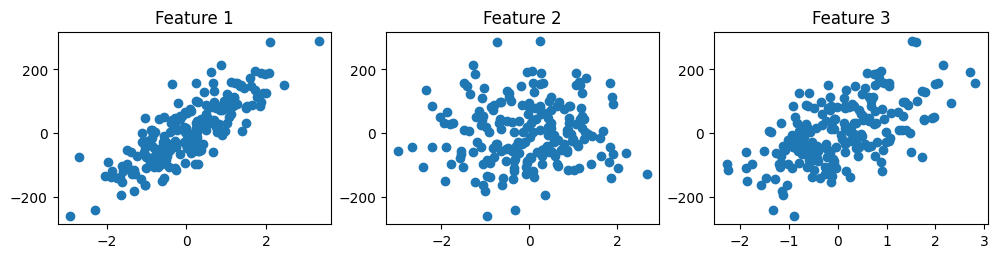

In [51]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,2.5))

ax1.scatter(df['feature1'],df['target'])
ax1.set_title('Feature 1')
ax2.scatter(df['feature2'],df['target'])
ax2.set_title('Feature 2')
ax3.scatter(df['feature3'],df['target'])
ax3.set_title('Feature 3')

### No Multicolinearity

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(x_train.shape[1]):
    vif.append(variance_inflation_factor(x_train,i))

In [53]:
pd.DataFrame({'vif':vif},index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.007179,1.016725,1.019546


<Axes: >

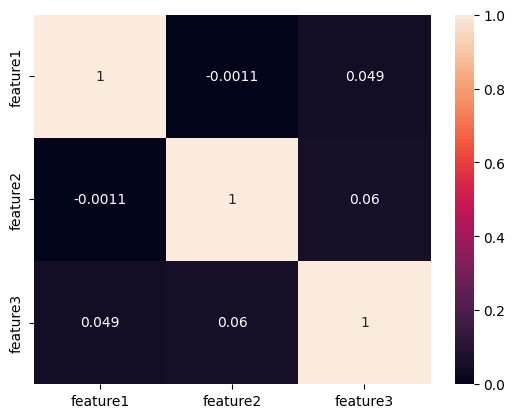

In [54]:
# Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

### Normality of Residuals

<Axes: ylabel='Density'>

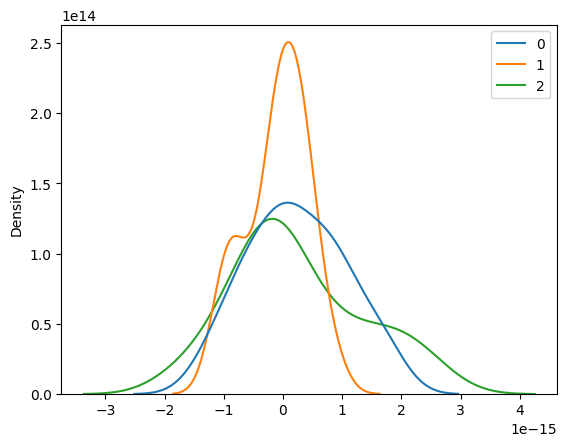

In [58]:
sns.kdeplot(residual)

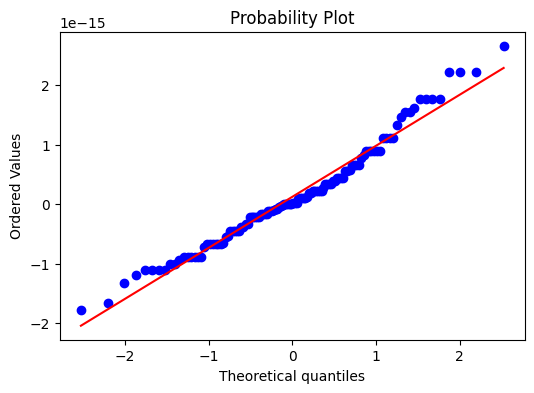

In [64]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual.ravel(),plot=ax,fit=True)

plt.show()

### Homoscedasticity

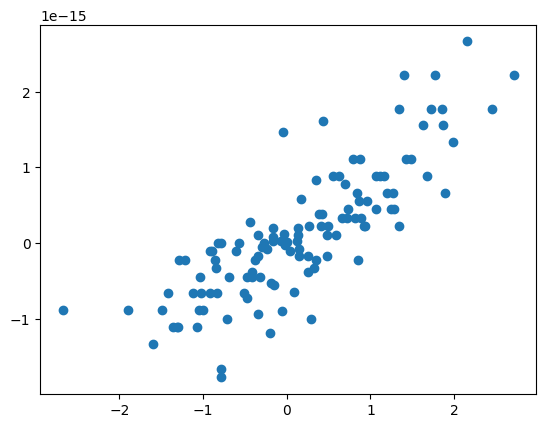

In [69]:
plt.scatter(y_pred, residual.ravel())

This is not Homoscedestic

### No Autocorrelation of Error

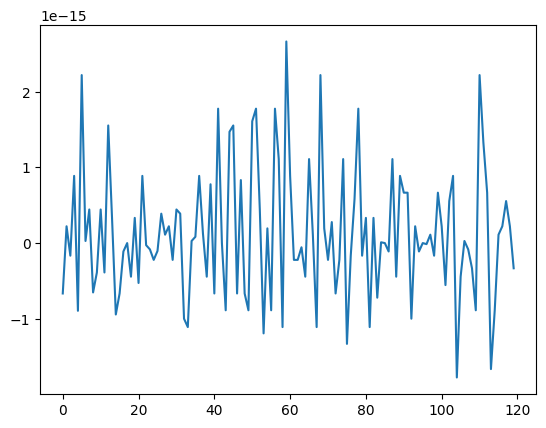

In [68]:
plt.plot(residual.ravel())